<a href="https://colab.research.google.com/github/BhuvanChaithanya/AI-ml/blob/main/apple_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
train = pd.read_csv('apple.csv')

In [27]:
train.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [28]:
train.isnull()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
3996,False,False,False,False,False,False,False,False,False
3997,False,False,False,False,False,False,False,False,False
3998,False,False,False,False,False,False,False,False,False
3999,False,False,False,False,False,False,False,False,False


In [29]:
#missing data

<Axes: >

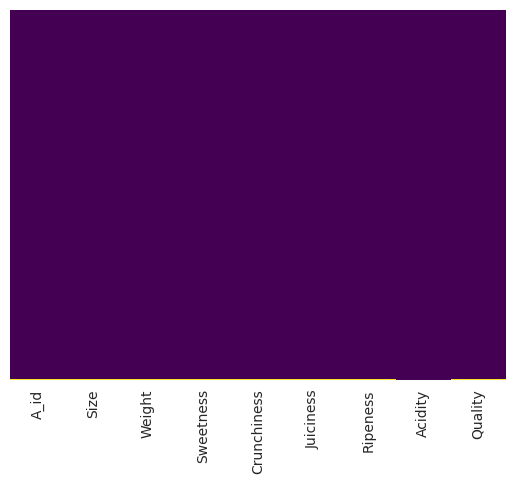

In [30]:
sns.heatmap(train.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

<ipython-input-31-b5efa3f04811>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Quality', data = train, palette = 'Set2')


<Axes: xlabel='Quality', ylabel='count'>

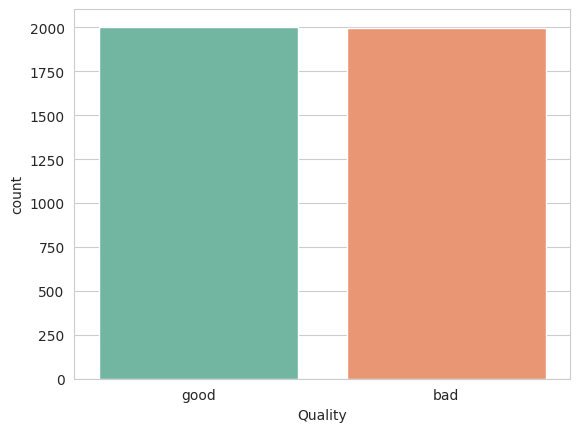

In [31]:
sns.set_style('whitegrid')
sns.countplot(x = 'Quality', data = train, palette = 'Set2')

In [32]:
train.dropna(inplace = True)

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 312.5+ KB


In [34]:
train.drop('A_id',axis = 1, inplace = True)

In [35]:
train.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [36]:
#tarin test split

In [37]:
pd.get_dummies(train['Quality'], drop_first = True).head()

,good
0,1
1,1
2,0
3,1
4,1


In [38]:
qual = pd.get_dummies(train['Quality'], drop_first = True)

In [39]:
train.drop(['Quality'], axis = 1, inplace = True)

In [40]:
train = pd.concat([train,qual], axis = 1)

In [41]:
train.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,good
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,1


In [43]:
train.rename(columns={'good': 'Quality'}, inplace=True)

In [44]:
train.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,1


In [45]:
train.drop('Quality', axis= 1).head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036


In [46]:
train['Quality'].head()

0    1
1    1
2    0
3    1
4    1
Name: Quality, dtype: uint8

In [47]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Quality', axis = 1), train['Quality'], test_size = 0.3, random_state = 42)

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
logmodel = LogisticRegression()

In [53]:
logmodel.fit(X_train, y_train)

LogisticRegression()

In [54]:
predictions = logmodel.predict(X_test)

In [55]:
from sklearn.metrics import confusion_matrix

In [56]:
accuracy = confusion_matrix(y_test, predictions)

In [57]:
accuracy

array([[442, 151],
       [146, 461]])

In [58]:
from sklearn.metrics import accuracy_score

In [59]:
acc_score = accuracy_score(y_test, predictions)
acc_score

0.7525

In [60]:
predictions

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [67]:
import random
predictions[random.randint(0,450)]

0